# Assignment 2: Predicting Minimum and Maximum PC prices



## 1. Introduction

The goal of this paper is to create a predictive model that estimates the minimal and maximal price of different laptops. This is done on the basis of a dataset that contains the minimum and maximum prices during a time span of three weeks. In order to achieve this, the model must be able to accurately predict both the value of the computer and whether the computer tends to fluctuate in price. 




## 2. Problem Description

<i>(Idee achter deze tekst:
-interessante,  aandacht trekkende openener die het idee van de paper samenvat
-Algemene info geven over de data, input and output
-Exploration of original data
)</i>

In this section, we will first give a short introduction to the dataset. Subsequently, the given features will be interpreted and explored. Finally, a short conclusion will be given to make way for the pre-processing, where more features will be added. 

### The dataset

The dataset is tabular and has around 500 instances and 20 features. Two of these features (“min price” and “max price”) are the output variables.<br>

#### The input variables:
The dataset consists of mainly categorical and nominal data. One example is “CPU type” (i3 or i5 or i7 or ...) which consists of discrete values. Another example is ram which is also nominal since it can only take a few values: 2, 4, 3, 6, 8, 12, 16, 32, or 64GB. 
The only numerical input variables is “weight”. Later on, however, a few extra numerical input variables will be engineered.<br>

#### The output variables:
The dataset has two target variables for every instance, a minimum and a maximum price. This means that the model will be more complex. These output variables are neither categorical nor nominal, they are numerical (continuous) variables. So, this will already eliminate the use of relatively straight forward binary decision tree modelling.<br>

The test set that was already given to us, does not contain any target values. This means that we still need to split off another additional test set from our training set. This new test set can be used to estimate the accuracy of the model and uncover possible flaws. 

### The features

We are now going to explore the features. First, we will have a glance at the design related features. Secondly, we will take a look at the basic features. Subsequently, we will discuss the CPU and finally we will talk about the GPU. 

<i> XXXXXXXX Histograms, correlation (Pearson, Cramer V) met uitleg komen eraan XXXXXXXXXXXXX </i>

#### Design related features <br>

The following features are all related to design, easthetics and the quality aspects of the laptops. Their effects on the price are more difficult to pin down. This, due to it being a result of perceived value, marketing efforts, customer segmentation and others. All those characteristics are more subject to the brand itself. So these variables might be good indicators of price variation, which is an important aspect of the predictive model.  <br>

<b>Screen_size (in inch):</b> The laptop market has relatively standardized screen sizes. Those sizes are 11.6, 13.3, 14, 15.6 and 17.3, with 15.6 being the most common one. This is clearly reflected in the data.<br>

<b>Pixel_x and pixel_y: </b> These two variables have a very strong correlation of 98%. This comes as no surprise as most screens nowadays have a screen ratio of 16:9. The most common format is 1920 Pixels, which is full HD, this is followed by 1366, a typical mid ranged laptop's resolution. The right hand side tail consists of high-end monitors such as 4K.
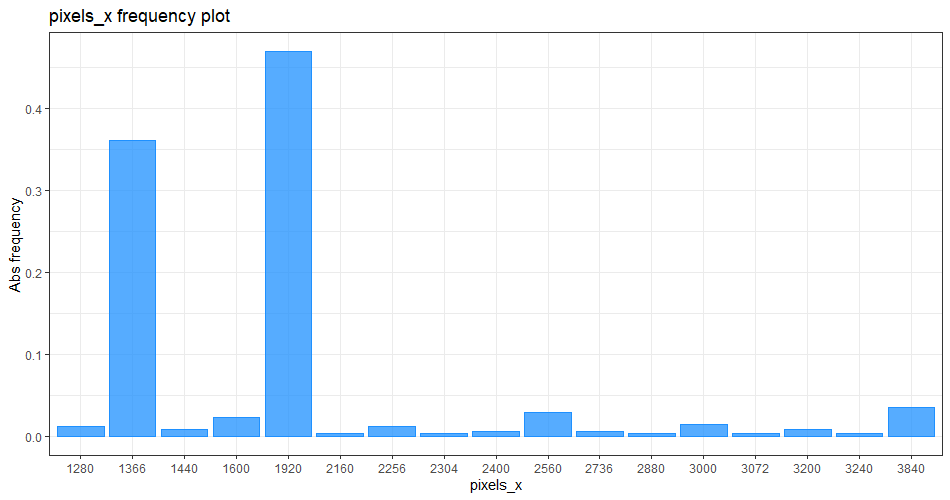
<i>XXXXXXX om grootte aan te passen moet je bij het downloaden de juiste witdth proberen in te schatten. Te klein kan je de assen niet meer onderscheiden XXXXXXXX</i>

<b>Screen_surface:</b> Glossy and matte screen surfaces both have advantages and disadvantages. Their pricing point is also similar. This is reflected in the frequency of their appearance. Except for a few unknown, glossy has a frequency of 55% and matte 45%.

<b>Touchscreen: </b> A more and more common trait with laptops, especially slimmer ones who are competing with tablets as well. This is present in one third of the laptops.

<b>Weight:</b> On the one hand, heavier laptops have more components such as extra storage, a discrete laptop gpu and even a discrete desktop gpu. On the other hand, they use components of higher quality which may be lighter f.e. SSD instead of HDD. The effect of weight is thus difficult to pin, but it is definitely not linear.
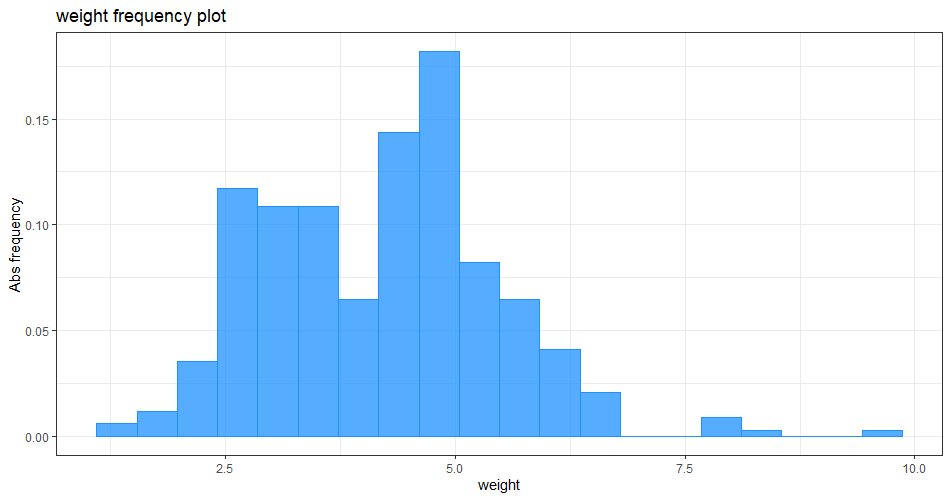

<b>Detachable keyboard: </b> This is a more uncommon trait with laptops. A typical example would be a Microsoft Surface Book, which emulates a tablet when the keyboard is detached. Only 4% of the laptops can detach their keyboard. There is a 28% correlation between touchscreen and detachable keyboard. Not surprisingly, every laptop with a detachable keyboard must have a touchscreen. The same cannot be said for the oposite though.

<b>Brand:</b> This gives a nice overview of the laptop market share. Note the brands such as Jumper and RCA. These are uncommon brands in the belgian market. They also make their own core and graphical processors, but more on that later.
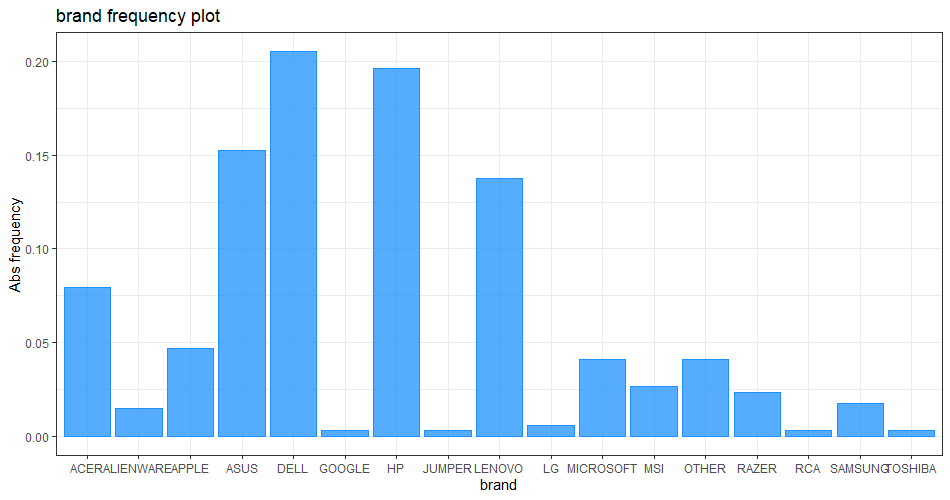


#### Basic Features
<br>
The following features are components of a computer that are not made by the laptops brand itself, but they are outscourced, made by other companies and used by all brands. This results into a more predicatable pricing of those components. E.g. If you are looking at two laptops one with 128GB SSD and the other with 256GB and all other specifications identical, the difference in price will be the price difference of these two SSD's plus the companies mark-up. 

<i>XXXXXXXXXXXHhmmm mss wat veel uitleg, later ga ik zien of ik gelijkaardige laptops vind waarmee ik dit punt kan stavenXXXXXXXXXXX --> Ik vind uitleg okee --> ik ook!</i>

<b>RAM:</b> Short term memory comes in very standardised numbers (a power of 2) from 2 up to 64 with a few exceptions. As reflected by the graph the most common configuration is with 8GB (38%). Simpeler computer have 4 GB (25%) and computers oriented towards gaming or video editing often have 16GB (24%). All other configuarations are below 5%.

<b>SSD:</b> Solid State Drive is a newer type of storage partially complementing the older HDD but also replacing them. The latter occurse often with laptops. Similar to RAM they usually come in a power of 2 as well. Note that 8 to 128GB configurations are typical for Chromebooks, where 128 and higher configurations are typical for other laptops. Solid state drives are becoming the norm as we speak. Because of their rising popularity and production, they are becoming cheaper every year. This variable may therefore also account for some price variation. Nevertheless, around 30% of the laptops do not have an SSD.
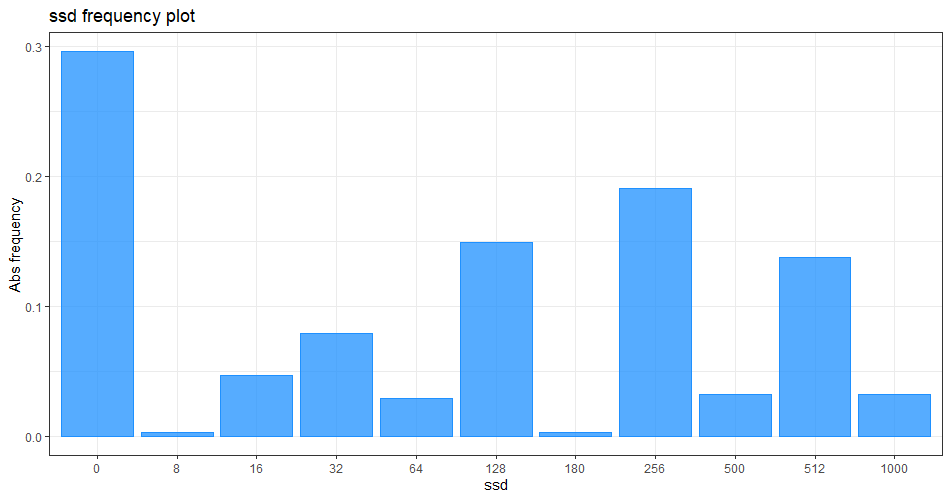

<b>Storage:</b> Consists of both the slower HDD and the faster SSD. There are many possible configurations. Usually the low-end market only has HDD's. The mid market tends to have SSD's only and the high-end market often has both. The correlation betwoon those two reaches 25%. This is because they carry partially similar information and they are both storing components.

<i> correlation is tussen HDD en SSD? maar moet de uitleg niet zijn dat 25% van de dataset van de high end market is? Want daar zijn ze beide op aanwezig? </i>

<i>XXXX Niet in training set CORRELATION XXXXXXXXXXXX</i>

<b>OS:</b> The operating system market is strongly dominated by Windows. Apple has its own MACOS and Chromebooks have their own Chrome OS. There are only a few tiny other players.

<b>OS details:</b> Specifies the OS in more detail. The distribution is very similar to the OS itself.

<i>XXXX Niet in training set, CORRELATIE Nope, geen hoge correlatie, maar wss omdat elke mac toch in 3-4 verschillende speciefieke versies kan voorkomen. Idem voor windows. Maarja, ze zijn toch allebij niet in het model uiteindelijk... XXXXXXXXXXXX </i>
<br>

#### CPU features
<br>
Because of the great importance of the CPUs in computers and the extensive feature engineering we will discuss later, CPUs get their own paragraph. Similar to the basic features, CPUs are also outsourced. 

<b>cpu:</b> Specifies the brand and the series. Intel is clearly the market leader with its well known i3, i5 and i7 series. A relatively small, yet imortant competitor is AMD. 
<i>XXXX Niet in training set XXXXXXXXXXXX</i>

<b>cpu_details:</b> All specifications of the CPU are contained in this variable. Unfortunatly, having all this information in only one string is not ideal and makes the variable a high-level categorical. In other words, the variable has too many classes. To deal with classes most models create dummies which is an extra parameter for almost every class. These high-level categoricals will introduce too many parameters in the model for relatively little information gain. In the pre-processing section, we will certainly come back to this variable. 
<br>
#### GPU features
<br>
The GPU gets a similar treatment as the CPU. All CPU's have a basic GPU included in their chip. But it is important to know that not all laptops have a dedicated GPU. A consumer that wishes to do more advanced, graphical demanding activities such as gaming, video editing and parallel calculations, can decide to buy a laptop with a dedicated/discrete GPU. This component is up to the more demaning tasks.

<b>discrete gpu:</b> This indicator will confirm the precence of a dedicated GPU (30%). 

<b>gpu:</b> This feature will specify the GPU used. In case no discrete GPU is present, the GPU in the CPU will be specified. Otherwise, the seperate graphical processor will be specified. This is also a high-level categorical feature.

### Conclusion
<br>
So, we have given an overview of the dataset. We have also introduced some basic components and some intuitions behind the component. But at this stage, we haven't got enough features yet. Moreover, there are some features that aren't useful in their form such as the high categorical features. We will discuss how we will preprocess the dataset in the next paragraph. 



## 3. Preprocessing

As we have mentioned in the former part, we have already split off a test set from our training set. We did this while making sure that the test set and the training set have approximately the same distribution. For this preprocessing step, we are only looking at our remaining training set. 

Preprocessing is critically important to extract useful features from the input data and other sources. Below some of the possibly useful features are determined. 

<i>XXXXXXXXXX Zal ik van de nieuwe features hier soms ook een plot en correlatie enzo geven? Yes XXXXXXXXXXX</i>

### Extracting useful features: 
<br>
There are a few features in the data set that contain interesting data, but are very detailed. Splitting them up into multiple features might prove useful.
<br>

#### Design related features
<br>
The first extracted feature is "pc_name" from "base_name". This is the most diffult feature to extract because the resulting feature still contains rather many possible values. The idea is to single out the brand and the series of the computer, e.g.: Dell inspiron, Dell lattitude or Dell XPS. Although, you could buy a lattitude or an XPS with almost identical components, such as cpu, gpu, ssd, memory, storage,... , there is still a significant price difference and possible price volatitlity because of the build quality, design and warranties included. This feature tries to capture those differences. Although it has much potential, this variable might remain too high-level categorical.

<i>XXXXXX niet in data set, maar een grafiek is wss ook niet mogelijk door "high-level categorical" XXXXXXXXX</i>
<br>

#### Basic features
<br>
From "OS_details" OS_details_2 was extracted. This new variable, however, contained identical information as the original feature and is thus not used any further.
<br>

#### CPU features 
<br>
Another important feature to extract data from is "cpu_details". This feature on itself is not very useful because it has a vast amount of possible values. In other words, it is a high-level categorical. Parts of the cpu's details, however, would yield very consistent, lower level categoricals. E.g. Two values for this feature are:<br>
INTEL CORE I7-8750H 2.2 GHZ (8TH GEN COFFEE LAKE HEXA-CORE WITH HYPER-THREADING)<br>
AMD RYZEN 3 2200U 2.5 GHZ (DUAL-CORE WITH SIMULTANEOUS MULTI-THREADING)<br>
The first two parts, cpu's brand and cpu's type, will be captured in following paragraph. Other extractable features are the processor code, GHz, generation, cpu architecture, number of cores and threading configuration. Unfortunately, generation and cpu architecture are only available to Intel processors. Extracting those, will result in too many missing values. The features "cpu_GHZ", "cpu_core" and "threading" are extracted. For the latter it is interesting to note that although there are three possible classes (no threading, hyper threading and multi threading) the new  feature is binary: threading yes (70%) or no. This, because it turns out that hyper threading is patented by Intel, therefore AMD calls their very similar technology multi threading. As we already have an Intel or AMD feature, making a distinction between the two threadings would not add any new information. Surprisingly, almost three quarters of the processors have threading. In the background, "cpu_details_2" is extracted as well. More on this in the "External data" part.

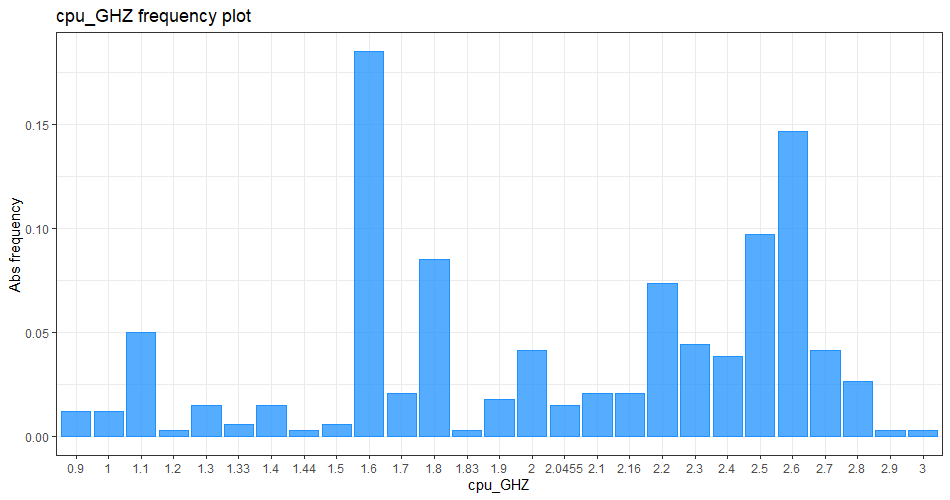
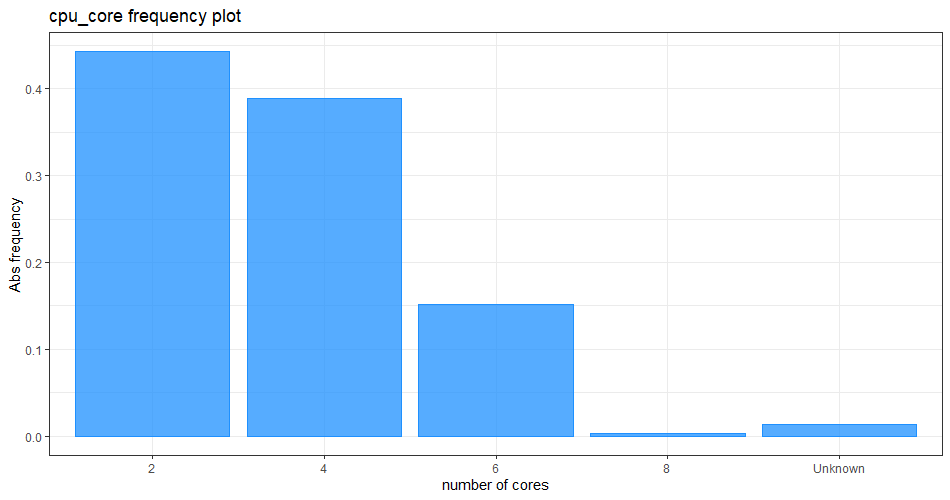

<i>XXXXXX Correlation GHZ en #Cores XXXXXXXXX</i>
<br>

#### CPU and GPU features

<br>
It might be beneficial to turn the values for "cpu" into two seperate features "cpu_brand" and "cpu_type_name".
Although "cpu_type_name" contains almost identical information as the original feature, "cpu_brand" is more high level with fewer possible values. "gpu" Gets the same treatment.
E.g. Two possible values for "cpu" are:<br>
INTEL CORE I7<br>
AMD A6<br>
Then creating seperate features results in:<br>
INTEL & CORE I7<br>
AMD & A6<br>


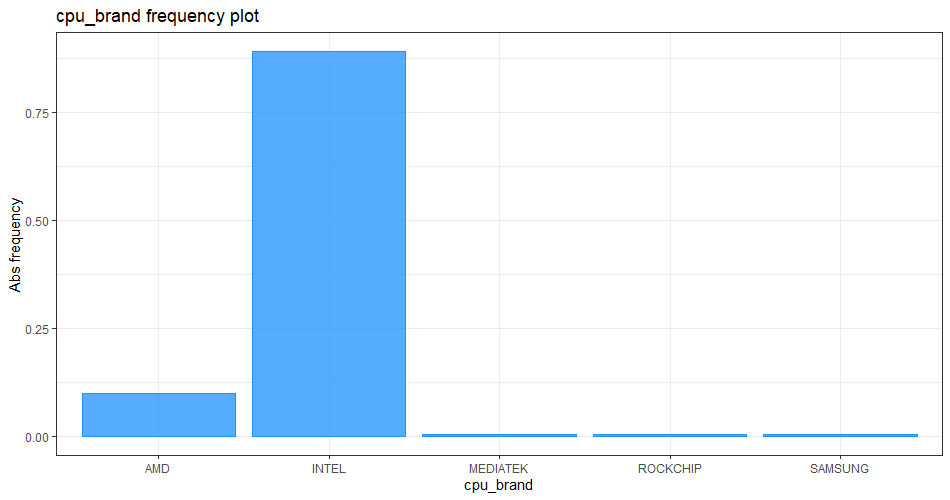
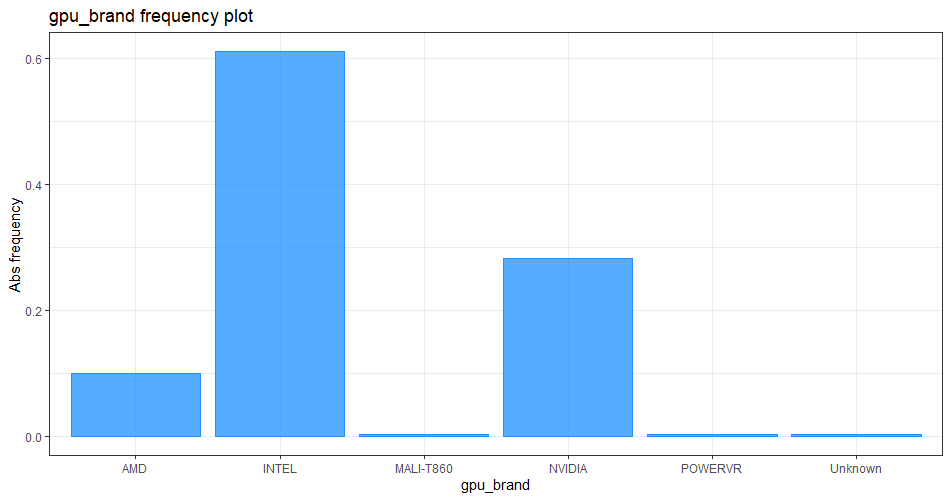

As mentioned before when looking at the brands, there are some uncommon CPU's and GPU's. One part is from the uncommon brands that make their own processors. Another part is from a few specific Chromebooks. Note that if an instance has an uncommon cpu, it will most likely have an uncommon gpu and vice versa.

<br>
In part 5 about our model, more detail will be given regarding the features used in the final model.

<br>


### External data 
<br>
As mentioned before, most features are categorical. On top of that, some of them have a wide range of possible values. These are called high-level categoricals. There are two very important components to a computer for which this is the case: cpu and gpu. They are key drivers in the price of any computer and making them more compareable and robust would be a great improvement.<br>

PassMark Software is a website that conducts a large amount of benchmarks and performance tests on WiFi conncection, software, hardware,... Althoug it is not ideal, with some basic Excell skills you can easily convert the data from the website to a neat table with the cpu name and its performance. Therefore cpu_benchmark and gpu_benchmark are added to the data table by using respectively cpu_details_2 and gpu_type.

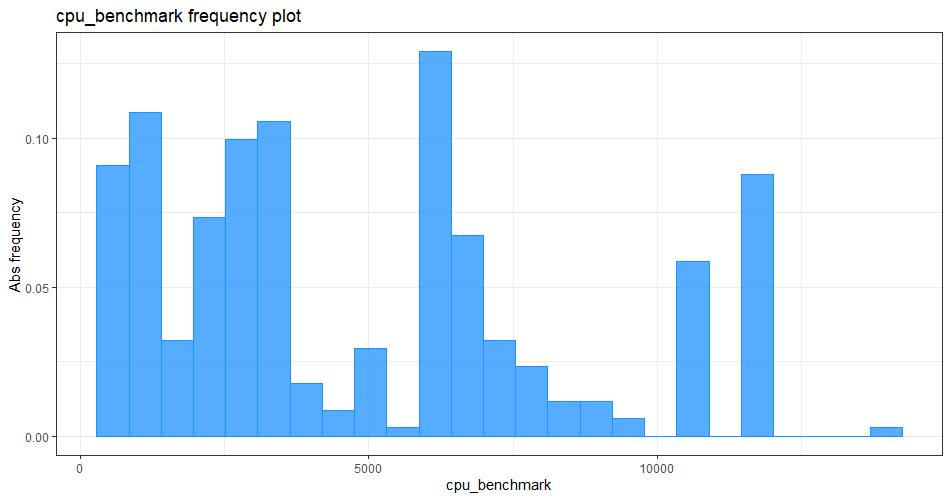
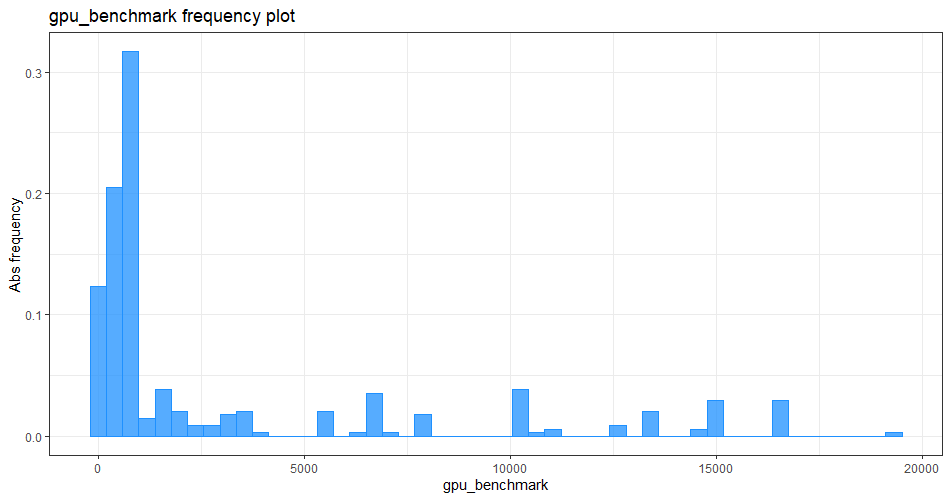
The GPU benchmark graph is not surprising if you remember that only 30% of the laptops sold have a dedicated GPU. Indeed, 70% of the laptops are piled up on the left hand side with less processing power. The tail consists of increasingly powerfull processors. Local maxima might be due to certain GPU's being very popular.
<br>

### Overview of extracted features
<br>
Here you can find an overview of all extracted features and the features they were derived from. This will also be very usefull when looking at missing values in the next section. Whenever a "mother" variable is missing, the derived variable will not be defined either.<br>
<br>

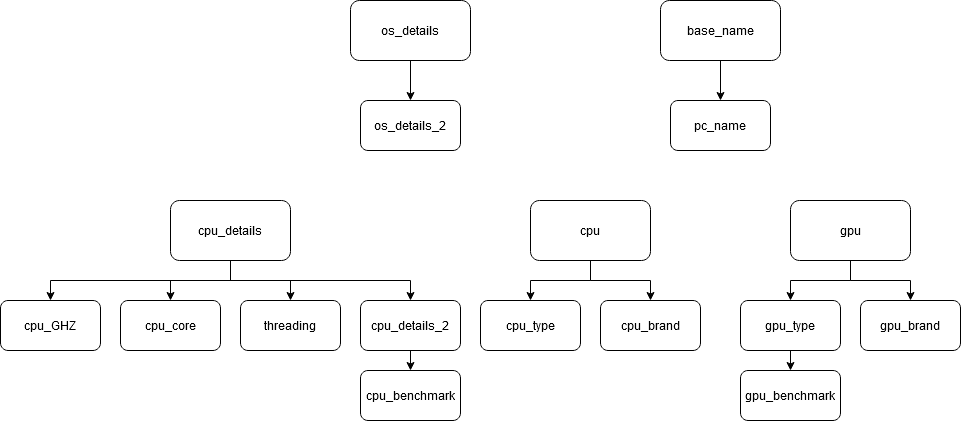

<br>
Not all correlations (Pearson) and associations (Cramer V) have been mentioned throughout the previous sections. This is because most of them just confirm the following: The laptop customers can be divided into a few segments: average usage, student/work usage, gamers,... In these segments themselves customers can have different purchasing power and within these two dimensions you can typically find similar components. 

### Missing values 
<br>
<i>XXXXWordt de mean, modus en median van de train set genomen, ook voor de test set?XXXXXX</i>
A few different tactics were used to deal with missing values. Creating a solution for all variables used in the model is of critical importance as the model itself is unable to deal with them. The next two paragraphs will talk about categorical & binary variables and numerical variables.

The main rule is to insert the value "unknown" in categorical and binary variables whenever no value is given. In most cases the categoricals are not ordered. Adding an Unknown class seemed the best solution. One exception is made for "detachable_keyboard" where the missing values were only Apple computers. This is probably due to a mistake in the data input process. When this value is missing, a 0 is entered. On top of that, 96% of the laptops do not have a detachable keyboard. For the ordinal categoricals the mode is taken

<i>XXXXX Why the mode and not the median?? for ordinals the median does make more sense. XXXXXX</i>

The main rule for numerical variables is to take the mean. An exception is made for "Pixels_X". This feature is actually similar to an ordinal categorical and considering there is a clearly preferred class in this variable (1920), the mode is taken to fill in the missing value.

<i>XXXX Uiteindelijk is er toch geen opsplitsing gemaakt bij de gpu benchmark voor interne vs discrete gpu's? XXXX</i>

The values that are determined to fill in the missing values in the training set, will also be used in the test set. Otherwise this would bias our results.  

<br>
<br>

### Other interesting findings 
<br>
<i>XXXXXXXX Reserve paragraaf :) XXXXXXXXXX
XXXXXXXX Simon, heb jij meerdere grafieken gemaakt en zijn dat de interessaste of zijn dit ze allemaal die je gemaakt hebt? Ik probeer een beetje het idee achter je exploration te vinden, want op zich is het wel heel goed dat er op prijsverschil ook gekeken is XXXXXXXXX</i>

When looking for features that drive price differences there were none that jumped out. Overall you could say that the more expensive laptops (i7, with gpu, with threading,...) tend to have higher price differences, but this is not surprising as they are more expensive in the first place. Threading, however, seems to have a more important effect than the others. Note that since 70% of the instances have threading it is to be expected that some more outliers are present here. These outliers only differ to similar laptops in one aspect: max_price. It seems these laptops were priced too high initially and were corrected later on.
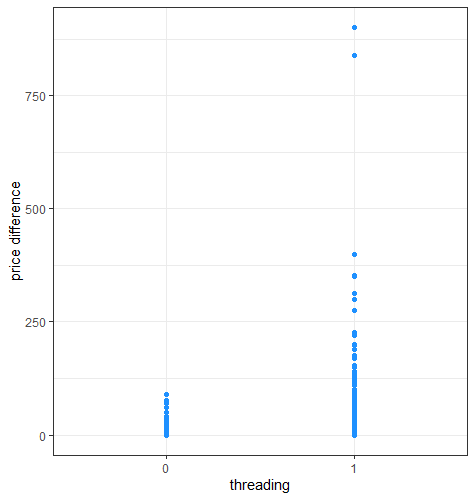
<br>
<br>
<br>
<br>
<br>
<br>
<br>

<i>
<b>Extracting useful features: </b>
<br>
- CPU brand
- CPU type (i3, i5, i7, Ryzen 5, Ryzen 7, etc)
- CPU clock speed (GHz)
- CPU number of cores (Dit is uiteindelijk niet gebeurd?)
- GPU type (GTX, RTX, Radeon, etc)
- OS version (7, 8.1, 10, Yosemite, Mojave)

<b> Externe data </b><br>
to fix "high-level categoricals"
- CPU benchmark
- GPU benchmark

<b> Missing values </b>


<b> Coding of Categorical Features </b></i>
   

## 4. Modelling Approaches

The model needs to be able to predict two values. A minimum price and a maximum price. Because these values are numerical, not all models are suitable for this. In general, because of the two target variables, a decision must be made whether to work with one or two models. Below is a list of possible models that can be used. <br>

<b> Possible models : </b>
- **Single Target Regression Trees:** Using input variables to devide data and fit simple local models at each leaf node of the tree. Two regression trees can be used to predict the two targets. One tree to predict the minimum value and another to predict the maximum value. This model generalizes well in case of missing or new data by combining the leaf nodes.<br>


- **Multi Target Regression:**  A tree that is able to predict multiple continuous targets at once. A multi-target regression tree better identifies the dependencies between the different target variables than a single-target regression tree and is often smaller than the two single-target trees combined.<br>


- **Random Forest Multi Target Regression:** This model adds to the Multi Target Regression that a Random Forest is used. This is a booklet of many different trees for which the predictions are combined. This technique is much more robust against noice and prevents overfitting.


- **Multi Output Neural Networks:** An artificial neural network with two output nodes. One node for the minimum price and one for the maximum price.

After considering all above models, we have decided to use a Random Forest Multi Target Regression. The reasons for this choice, will be discussed in the next chapter. 



## 4. Random Forest Multi Target Regression

### Random Forest Multi Target Regression

#### Multi Target Regression

When comparing building multiple single-target regression models or one multi-target regression model, multiple advantages for a multi-target regression model can be found. Assuming that the minimum and maximum price, the two predictions we are looking for, are strongly correlated -which is realistic- there is a strong tendency to prefer a multi-target regression model since this model takes into account the correlation between the outputs and will therefore give a more accurate model. 
Another advantage of a multi-target regression model is that it will produce a simpler model than two single-target regression models and will therefore also have a better computational efficiency.
Further, it is usually also easier to interpret one multi-target model than to interpret several different single-target models. 


#### Random Forest 

The performance of the model can be improved by using the random forest technique in order to make sure our model will not overfit on the training data. A random forest adds to bagging that in every node only a subset of features is used to choose a split. 
However, a random forest has the disadvantage that we will lose the interpretability of our single multi-target model because of the multiple trees that are built based on subsets of features.

<br>
<br>

<i> Hieronder zou ik dus de code van het model zetten. Dus sowieso deel 4 tot 7 uit de notebook MTRT van Simon. deel 3 over feature importance moet hier dan misschien ook nog kort besproken worden, welke features we nu juist in ons model gestoken hebben? 

Deel 1 en 2 weet ik niet of we die ook hier willen, of dat we deel 2 over missing values niet beter onder het gedeelte over missing values zetten? Dit lijkt me overzichtelijker en 'luchtiger'. 
    
En Deel 6 over Visualisation of model and data, dat past misschien beter bij evaluation? </i>




### Multi Output Neural Network

Beside the Random Forest Multi Target Regression, a Multi Output Neural Network has also been considered. More specific, a feed forward Neural Network with one hidden layer and two output nodes. One for the minimum price and the other one for the maximum price. While testing the Multi Output Neural Network, we discovered that the results were way worse than our Random Forest Multi Target Regression model, so this model has been put aside.
<br>

## 5. Model Evaluation & Hidden Leaderboard

### scatterplot

#### importing useful tools

In [2]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#### Loading the data

In [3]:
mydata= pd.read_csv('testingdata_results.csv')
df = pd.DataFrame(mydata)
df.head()

,Unnamed: 0,index,cpu_core,brand,cpu_brand,gpu_brand,gpu,cpu_type_name,screen_surface,touchscreen,discrete_gpu,detachable_keyboard,threading,id_x,screen_size,ram,ssd,storage,weight,cpu_GHZ,pixels_x,cpu_benchmark,gpu_benchmark,pred_min_price,act_min_price,pred_max_price,act_max_price,id_y
0,0,480,QUAD-CORE,DELL,AMD,AMD,AMD RADEON VEGA 10,RYZEN 7,GLOSSY,1,0,0.0,1.0,23196,13.3,12,256,256,3.86,2.20,1920,6903.0,1571.0,608.654925,512.99,617.229150,517.99,23196
1,1,449,HEXA-CORE,MSI,INTEL,NVIDIA,NVIDIA GEFORCE GTX 1060,CORE I7,MATTE,0,1,0.0,1.0,26773,15.6,16,512,512,4.14,2.20,1920,10418.0,10210.0,1664.221262,2099.00,1756.052225,2099.00,26773
2,2,475,QUAD-CORE,HP,INTEL,INTEL,INTEL UHD 620,CORE I5,GLOSSY,1,0,0.0,1.0,27887,15.6,12,0,1000,4.23,1.60,1366,6372.0,888.0,581.207662,621.00,591.804862,621.99,27887
3,3,434,DUAL-CORE,APPLE,INTEL,INTEL,INTEL HD 6000,CORE I5,GLOSSY,0,0,0.0,1.0,28480,11.6,4,128,128,2.38,1.60,1366,2142.0,829.0,387.233413,418.00,416.794688,418.00,28480
4,4,368,QUAD-CORE,ACER,INTEL,INTEL,INTEL HD,ATOM,MATTE,0,0,0.0,0.0,29847,15.6,4,16,16,4.30,1.04,1366,1196.0,10.0,220.768800,197.97,227.550888,197.99,29847


#### Scatterplot: Minimum price

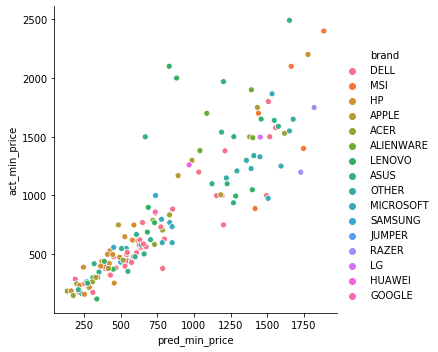

In [4]:
sns.relplot(x='pred_min_price',y='act_min_price',hue='brand',data=df)

#### Scatterplot: Maximum price

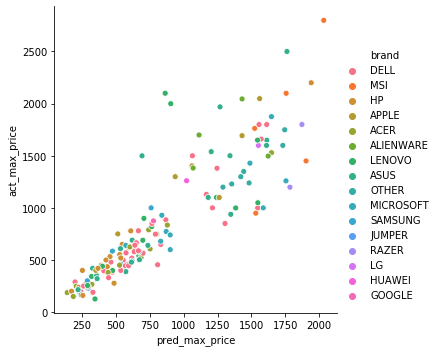

In [5]:
sns.relplot(x='pred_max_price',y='act_max_price',hue='brand',data=df)